# medianBlur

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import time

def my_show(img, size=(5,5)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()
    
    
def medianBlur(img,kernel=3,padding_way=None):
    imarray = img
    height = imarray.shape[0]
    width = imarray.shape[1]
    channal = imarray.shape[2]
    if not padding_way:
        edge = int((kernel - 1) / 2)
        if height - 1 - edge <= edge or width - 1 - edge <= edge:
            print("kernel is too large.")
            return None
        new_arr = np.zeros((height, width, channal), dtype="uint8")
        for i in range(edge,height-1 - edge):
            for j in range(edge,width-1 - edge):
                #new_arr[i, j, :] = np.median(np.median(imarray[i - edge:i + edge+1, j - edge:j + edge+1,:], axis=0), axis=0)
                new_arr[i, j,0] = np.median(imarray[i - edge:i + edge + 1, j - edge:j + edge + 1,0])# 调用np.median求取中值
                new_arr[i, j,1] = np.median(imarray[i - edge:i + edge + 1, j - edge:j + edge + 1,1])
                new_arr[i, j,2] = np.median(imarray[i - edge:i + edge + 1, j - edge:j + edge + 1,2])
    return new_arr


def add_noise(img,snr):
    h=img.shape[0]
    w=img.shape[1]
    img1=img.copy()
    sp=h*w   # 计算图像像素点个数
    NP=int(sp*(1-snr))   # 计算图像椒盐噪声点个数
    for i in range (NP):
        randx=np.random.randint(1,h-1)   # 生成一个 1 至 h-1 之间的随机整数
        randy=np.random.randint(1,w-1)   # 生成一个 1 至 w-1 之间的随机整数
        if np.random.random()<=0.5:   # np.random.random()生成一个 0 至 1 之间的浮点数
            img1[randx,randy]=0
        else:
            img1[randx,randy]=255
    
    return img1


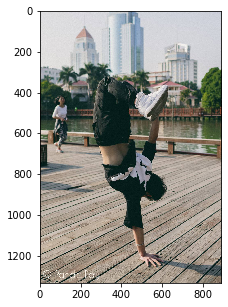

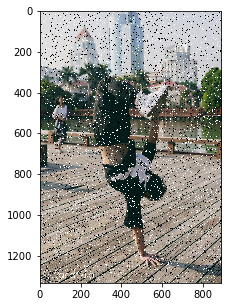

C:\Users\love7\.conda\envs\pytorch_gpu\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


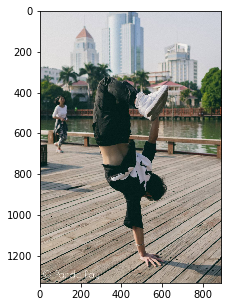

Time used: 65.46197379999998


C:\Users\love7\.conda\envs\pytorch_gpu\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


In [2]:
#原图
img_dark = cv2.imread('wang.jpg',1)
my_show(img_dark,size=(5,5))

#给原图加噪声
img_noise = add_noise(img_dark,0.9)
my_show(img_noise,size=(5,5))

#滤波并计算运行时间
start = time.clock()
img_med = medianBlur(img_noise)
my_show(img_med,size=(5,5))
elapsed = (time.clock() - start)
print("Time used:",elapsed)

# RANSAC伪代码：

In [ ]:
'''
input： 
data —— 一组观测点数据 
model —— 适应于数据的模型 
n —— 适用于模型的最少数据个数 
k —— 算法的迭代次数 
t —— 用于决定数据是否适应于模型的阈值 
d —— 判定模型是否适用于数据集的数据数目

output： 
best_model —— 跟数据最匹配的模型参数（如果没有找到好的模型，返回null） 
best_consensus_set —— 估计出模型的数据点 
best_error —— 跟数据相关的估计出的模型错误
'''

In [ ]:
iterations = 0
best_model = null
best_consensus_set = null
best_error = 无穷大
while ( iterations < k )
    maybe_inliers = 从数据集中随机选择n个点
    maybe_model = 适合于maybe_inliers的模型参数
    consensus_set = maybe_inliers

    for ( 每个数据集中不属于maybe_inliers的点 ）:
        if ( 如果点适合于maybe_model，且错误 < t ）:
            将点添加到consensus_set
            if （ consensus_set中的元素数目 > d ）:
                已经找到了好的模型，现在测试该模型到底有多好
                better_model = 适合于consensus_set中所有点的模型参数
                this_error = better_model究竟如何适合这些点的度量
                if ( this_error < best_error ):
                    我们发现了比以前好的模型，保存该模型直到更好的模型出现
    
    best_model =  better_model
    best_consensus_set = consensus_set
    best_error =  this_error
    iterations += 1
            
返回 best_model, best_consensus_set, best_error